In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")

In [ ]:
device='cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving mitbih_train.csv to mitbih_train.csv
Saving mitbih_test.csv to mitbih_test.csv


In [ ]:
train_data = pd.read_csv("mitbih_train.csv", header=None)
test_data = pd.read_csv("mitbih_test.csv", header=None)

NameError: name 'pd' is not defined

###Exploratory Data Analysis

In [ ]:
# Show the shape and the first few rows of the train_data
train_data.shape

(87554, 188)

In [ ]:
train_data.iloc[:, -1].value_counts().sort_index()

,count
187,
0.0,72471
1.0,2223
2.0,5788
3.0,641
4.0,6431


In [ ]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
test_data.shape

(21892, 188)

In [ ]:
test_data.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
print(train_data.isnull().sum())
print(test_data.isnull().sum())

0      0
1      0
2      0
3      0
4      0
      ..
183    0
184    0
185    0
186    0
187    0
Length: 188, dtype: int64
0      0
1      0
2      0
3      0
4      0
      ..
183    0
184    0
185    0
186    0
187    0
Length: 188, dtype: int64


In [ ]:
train_data.iloc[:, -1].unique()

array([0., 1., 2., 3., 4.])

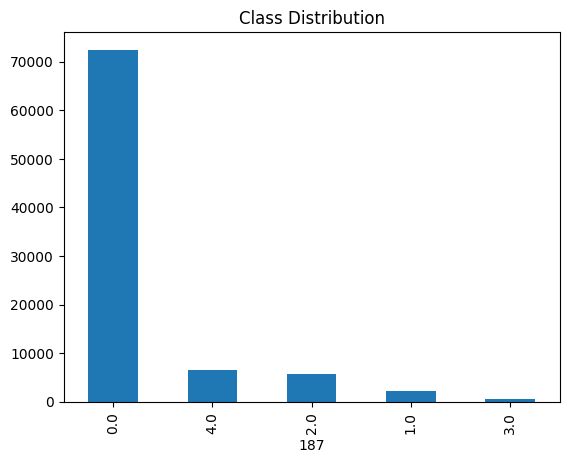

In [ ]:
train_data.iloc[:, -1].value_counts().plot(kind='bar', title='Class Distribution')
plt.show()

###Seperate features and labels

In [ ]:
X_train=train_data.iloc[:,:-1].values
y_train=train_data.iloc[:,-1].values

X_test=test_data.iloc[:,:-1].values
y_test=test_data.iloc[:,-1].values

###Normalize the ECG signals

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

###visualize Random Heartbeats from the train_data

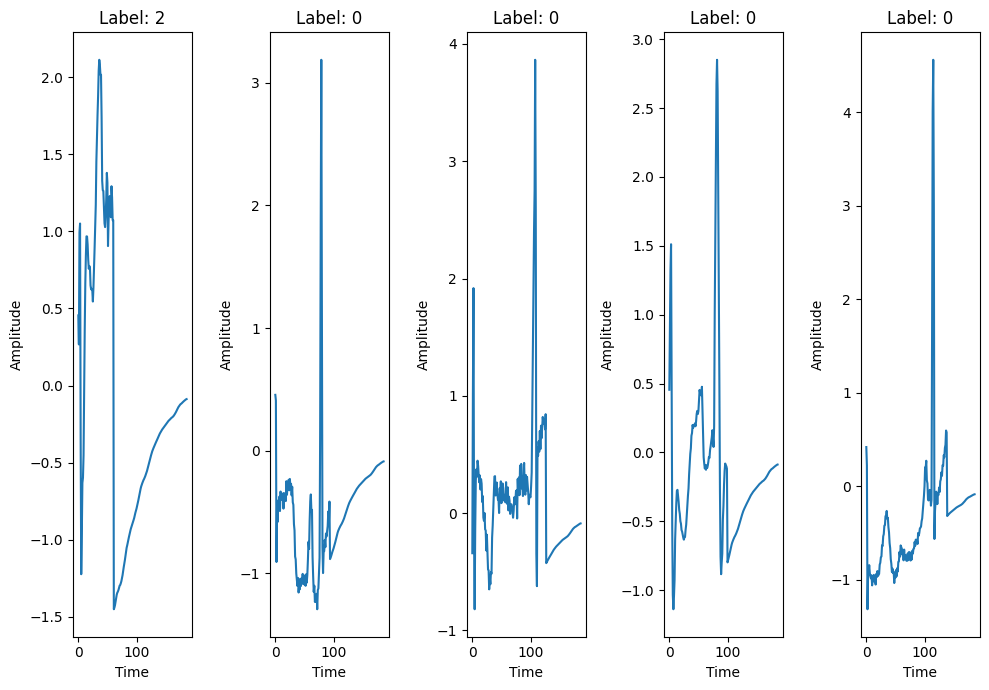

In [ ]:
#Shuffle the train_data
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train, random_state=42)
plt.figure(figsize=(10, 7))
import random
random_indices = random.sample(range(len(X_train)), 5)
for i, idx in enumerate(random_indices):
    plt.subplot(1, 5, i + 1)
    plt.plot(X_train[idx])
    plt.title(f"Label: {int(y_train[idx])}")
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.tight_layout()
#plt.suptitle("Random Heartbeats from Training Data", fontsize=16)
plt.show();

###Convert to a PyTorch Dataset

*   Élément de liste
*   Élément de liste



In [ ]:
from torch.utils.data import Dataset, DataLoader

class ECGDataset(Dataset):
    def __init__(self, data, labels):
        self.data = torch.tensor(data, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]

In [ ]:
train_dataset = ECGDataset(X_train, y_train)
test_dataset = ECGDataset(X_test, y_test)

train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x789d183113d0>,
 <torch.utils.data.dataloader.DataLoader at 0x789d1a060710>)

:###Generate Wavelet Features(for Dual Branch)

In [ ]:
!pip install PyWavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 28.4 MB/s eta 0:00:00


In [ ]:
import pywt

In [ ]:
# --- Wavelet Feature Extraction ---
def compute_wavelet(signal):
    coeffs, _ = pywt.cwt(signal, scales=np.arange(1, 31), wavelet='morl')
    return np.abs(coeffs).mean(axis=0)  # simple summary

# Apply to all training and testing data
wavelet_train = np.array([compute_wavelet(x) for x in X_train])
wavelet_test = np.array([compute_wavelet(x) for x in X_test])

###Define Dual_Branch Transformer model
####Each branch: 1D Transformer for raw or wavelet input
####Then: Concatenate → FC Layer → Classification

In [ ]:
import torch.nn as nn

class ECGTransformer(nn.Module):
    def __init__(self, input_len):
        super(ECGTransformer, self).__init__()

        self.raw_branch = nn.Sequential(
            nn.Linear(input_len, 128),
            nn.ReLU(),
            nn.LayerNorm(128)
        )

        self.freq_branch = nn.Sequential(
            nn.Linear(input_len, 128),
            nn.ReLU(),
            nn.LayerNorm(128)
        )

        self.classifier = nn.Sequential(
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 5)  # 5 classes
        )

    def forward(self, raw, freq):
        raw_out = self.raw_branch(raw)
        freq_out = self.freq_branch(freq)
        combined = torch.cat((raw_out, freq_out), dim=1)
        return self.classifier(combined)

model=ECGTransformer(input_len=X_train.shape[1]).to(device)
model

ECGTransformer(
  (raw_branch): Sequential(
    (0): Linear(in_features=187, out_features=128, bias=True)
    (1): ReLU()
    (2): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
  )
  (freq_branch): Sequential(
    (0): Linear(in_features=187, out_features=128, bias=True)
    (1): ReLU()
    (2): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
  )
  (classifier): Sequential(
    (0): Linear(in_features=256, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=5, bias=True)
  )
)

###Training loop

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [ ]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100
    return acc

In [ ]:
torch.manual_seed(42)
epochs=3
for epoch in range(epochs):
    model.train()
    for i, (raw, labels) in enumerate(train_dataloader):
        raw, labels = raw.to(device), labels.to(device)
        freq = torch.tensor([compute_wavelet(x.cpu().numpy()) for x in raw]).to(device)

        y_preds = model(raw, freq)
        loss = loss_fn(y_preds, labels)
        acc=accuracy_fn(labels,y_preds.argmax(dim=1))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f"Epoch: {epoch+1} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% ")

Epoch: 0 | Loss: 0.01117, Accuracy: 100.00% 
Epoch: 1 | Loss: 0.00237, Accuracy: 100.00% 
Epoch: 2 | Loss: 0.00143, Accuracy: 100.00% 
Epoch: 3 | Loss: 0.00282, Accuracy: 100.00% 


KeyboardInterrupt: 

##As we can see our model is overfitting
## modifications to prevent overfitting:
####Data augmentation:

In [ ]:
# Data Augmentation
import torch.nn.functional as F
class ECGAugmentation:
    def __call__(self, x):
        # Add random noise
        x += torch.randn_like(x) * 0.01
        # Random time warping
        # Fix: Use a fixed scaling factor for all samples in the batch
        scale_factor = random.uniform(0.9, 1.1)  # Generate scale factor outside loop
        if random.random() > 0.5:
            x = F.interpolate(x.unsqueeze(0).unsqueeze(0),
                            scale_factor=scale_factor, # Use fixed factor
                            mode='linear').squeeze()
        # Pad or truncate to ensure consistent length
        target_len = 187  # Choose the desired length
        x = F.pad(x, (0, target_len - len(x))) if len(x) < target_len else x[:target_len]
        return x

# Create augmented dataset
class AugmentedDataset(torch.utils.data.Dataset):
    def __init__(self, dataset, augment):
        self.dataset = dataset
        self.augment = augment

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        x, y = self.dataset[idx]
        if self.augment:
            x = self.augment(x)
        return x, y

augment = ECGAugmentation()

In [ ]:
train_dataset = AugmentedDataset(train_dataset, augment)

In [ ]:
test_dataset=AugmentedDataset(test_dataset, augment)

####Handle class imbalance

In [ ]:
# Handle class imbalance
# Convert y_train to integers before using np.bincount
y_train_int = y_train.astype(int)
class_counts = np.bincount(y_train_int)
class_weights = 1. / torch.tensor(class_counts, dtype=torch.float)
class_weights = class_weights.to(device)

In [ ]:
# Model Architecture (Dual-Branch Transformer)
class ECGTransformerV1(nn.Module):
    def __init__(self, input_dim, num_classes, dropout_rate=0.5):
        super(ECGTransformerV1, self).__init__()

          # Add gradient clipping in your training loop
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

        # Temporal branch
        self.temporal_proj = nn.Linear(input_dim, 64)
        self.temporal_transformer = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=64, nhead=8, dim_feedforward=256),
            num_layers=2
        )

        # Frequency branch (assuming wavelet features)
        self.freq_proj = nn.Linear(input_dim, 64)
        self.freq_transformer = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=64, nhead=8, dim_feedforward=256),
            num_layers=2
        )

        # Combine branches
        self.combine = nn.Linear(128, 64)
        self.dropout = nn.Dropout(dropout_rate)
        self.classifier = nn.Linear(64, num_classes)

        # Batch normalization
        self.bn1 = nn.BatchNorm1d(64)
        self.bn2 = nn.BatchNorm1d(64)

    def forward(self, x):
        # Temporal branch
        x_temp = self.temporal_proj(x)
        x_temp = self.bn1(x_temp.transpose(1, 2)).transpose(1, 2)
        x_temp = self.temporal_transformer(x_temp)
        x_temp = x_temp.mean(dim=1)

        # Frequency branch (using same input for demo - replace with wavelet features)
        x_freq = self.freq_proj(x)
        x_freq = self.bn2(x_freq.transpose(1, 2)).transpose(1, 2)
        x_freq = self.freq_transformer(x_freq)
        x_freq = x_freq.mean(dim=1)

        # Combine branches
        x = torch.cat([x_temp, x_freq], dim=1)
        x = self.combine(x)
        x = self.dropout(x)
        x = self.classifier(x)

        return x
model_1=ECGTransformerV1(input_dim=X_train.shape[1],num_classes=5).to(device)
model_1


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


ECGTransformerV1(
  (temporal_proj): Linear(in_features=187, out_features=64, bias=True)
  (temporal_transformer): TransformerEncoder(
    (layers): ModuleList(
      (0-2): 3 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=64, out_features=64, bias=True)
        )
        (linear1): Linear(in_features=64, out_features=256, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
        (linear2): Linear(in_features=256, out_features=64, bias=True)
        (norm1): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.1, inplace=False)
        (dropout2): Dropout(p=0.1, inplace=False)
      )
    )
  )
  (freq_proj): Linear(in_features=187, out_features=64, bias=True)
  (freq_transformer): TransformerEncoder(
    (layers): ModuleList(
      (0-2): 3 x TransformerEncoderLayer(
        (self_attn): M

In [ ]:
# Loss function with class weights
loss_fn = nn.CrossEntropyLoss(weight=class_weights)

# Optimizer with weight decay (L2 regularization)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)

# Learning rate scheduler
from torch.optim.lr_scheduler import ReduceLROnPlateau
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3, verbose=True)


/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


In [ ]:
batch_size = 64
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader=DataLoader(test_dataset,batch_size=batch_size,shuffle=False)

In [ ]:
torch.manual_seed(42)
epochs=3

for epoch in range(epochs):
    model.train()
    #loss = 0
    #correct = 0
    #total = 0

    for inputs, labels in train_dataloader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Calculate frequency features
        freq = torch.tensor([compute_wavelet(x.cpu().numpy()) for x in inputs]).to(device)

        # Forward pass with both raw and frequency data
        outputs = model(inputs, freq)
        loss = loss_fn(outputs, labels)
        acc=accuracy_fn(labels,outputs.argmax(dim=1))
        # Backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f"Epoch: {epoch+1} | Loss: {loss:.4f} , Accuracy: {acc:.2f}%")

Epoch: 1 | Loss: 0.7192 , Accuracy: 50.00%
Epoch: 2 | Loss: 0.0416 , Accuracy: 100.00%
Epoch: 3 | Loss: 0.3953 , Accuracy: 100.00%


###As we see our model is still overfitting , we need other modifications

### Modifications to prevent overfitting part 2: We will:
#####apply cross-validation on the training data.
#####Make advanced data augmentation
#####Add Early stopping

###Apply cross validation

In [ ]:
from sklearn.model_selection import StratifiedKFold

X = train_data.iloc[:,:-1].values
y = train_data.iloc[:,-1].values

k_folds = 5
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
    print(f'\nFOLD {fold + 1}')
    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]


FOLD 1

FOLD 2

FOLD 3

FOLD 4

FOLD 5


In [ ]:
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [ ]:
train_dataset = ECGDataset(X_train, y_train)
val_dataset = ECGDataset(X_val, y_val)

In [ ]:

train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=64, shuffle=False)

train_dataloader, val_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x789e31dbc7d0>,
 <torch.utils.data.dataloader.DataLoader at 0x789e31dbd890>)

In [ ]:
# --- Wavelet Feature Extraction ---
def compute_wavelet(signal):
    coeffs, _ = pywt.cwt(signal, scales=np.arange(1, 31), wavelet='morl')
    return np.abs(coeffs).mean(axis=0)

# Apply to all training and validation data
wavelet_train = np.array([compute_wavelet(x) for x in X_train])
wavelet_val = np.array([compute_wavelet(x) for x in X_val])

###Advanced Data Augmentation

In [ ]:
#class ECGAugmentation:
#    def __call__(self, x):
        # Add random noise
#        x += torch.randn_like(x) * 0.01
        # Random time warping
#        if random.random() > 0.5:
#            x = F.interpolate(x.unsqueeze(0).unsqueeze(0),
#                            scale_factor=random.uniform(0.9, 1.1),
#                            mode='linear').squeeze()
#        return x
class ECGAugmentation:
    def __call__(self, x):
        # Existing augmentations
        x += torch.randn_like(x) * 0.01

        # New augmentations:
        # Random scaling
        scale = random.uniform(0.8, 1.2)
        x = x * scale

        # Random channel dropout
        if random.random() < 0.1:
            chan = random.randint(0, x.size(0)-1)
            x[chan] = 0

        return x

# Create augmented dataset
class AugmentedDataset(torch.utils.data.Dataset):
    def __init__(self, dataset, augment):
        self.dataset = dataset
        self.augment = augment

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        x, y = self.dataset[idx]
        if self.augment:
            x = self.augment(x)
        return x, y

augment = ECGAugmentation()
train_dataset = AugmentedDataset(train_dataset, augment)

###Handle class imbalance

In [ ]:
class_counts = np.bincount(y_train.astype(int))
class_weights = 1. / torch.tensor(class_counts, dtype=torch.float)
class_weights = class_weights.to(device)

In [ ]:
# Model Architecture (Dual-Branch Transformer)
class ECGTransformerV3(nn.Module):
    def __init__(self, input_dim, num_classes, dropout_rate=0.5):
        super(ECGTransformerV3, self).__init__()

        # Temporal branch
        self.temporal_proj = nn.Linear(input_dim, 64)
        self.temporal_transformer = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=64, nhead=8, dim_feedforward=256),
            num_layers=3
        )

        # Frequency branch (assuming wavelet features)
        self.freq_proj = nn.Linear(input_dim, 64)
        self.freq_transformer = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=64, nhead=8, dim_feedforward=256),
            num_layers=3
        )

        # Combine branches
        self.combine = nn.Linear(128, 64)
        self.dropout = nn.Dropout(dropout_rate)
        self.classifier = nn.Linear(64, num_classes)

        # Batch normalization
        self.bn1 = nn.BatchNorm1d(64)
        self.bn2 = nn.BatchNorm1d(64)

    def forward(self, x):
        # Temporal branch
        x_temp = self.temporal_proj(x)
        x_temp = self.bn1(x_temp.transpose(1, 2)).transpose(1, 2)
        x_temp = self.temporal_transformer(x_temp)
        x_temp = x_temp.mean(dim=1)

        # Frequency branch (using same input for demo - replace with wavelet features)
        x_freq = self.freq_proj(x)
        x_freq = self.bn2(x_freq.transpose(1, 2)).transpose(1, 2)
        x_freq = self.freq_transformer(x_freq)
        x_freq = x_freq.mean(dim=1)

        # Combine branches
        x = torch.cat([x_temp, x_freq], dim=1)
        x = self.combine(x)
        x = self.dropout(x)
        x = self.classifier(x)

        return x

model_3 = ECGTransformerV3(input_dim=X_train.shape[1], num_classes=5).to(device)
model_3

ECGTransformerV3(
  (temporal_proj): Linear(in_features=187, out_features=64, bias=True)
  (temporal_transformer): TransformerEncoder(
    (layers): ModuleList(
      (0-2): 3 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=64, out_features=64, bias=True)
        )
        (linear1): Linear(in_features=64, out_features=256, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
        (linear2): Linear(in_features=256, out_features=64, bias=True)
        (norm1): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.1, inplace=False)
        (dropout2): Dropout(p=0.1, inplace=False)
      )
    )
  )
  (freq_proj): Linear(in_features=187, out_features=64, bias=True)
  (freq_transformer): TransformerEncoder(
    (layers): ModuleList(
      (0-2): 3 x TransformerEncoderLayer(
        (self_attn): M

In [ ]:
# Loss function with class weights
loss_fn = nn.CrossEntropyLoss(weight=class_weights)

# Optimizer with weight decay (L2 regularization)
optimizer = torch.optim.Adam(model_3.parameters(), lr=0.001, weight_decay=1e-4)

# Learning rate scheduler
from torch.optim.lr_scheduler import ReduceLROnPlateau
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3, verbose=True)


/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


###Training loop:

In [ ]:
best_val_loss = float('inf')
patience = 5
patience_counter = 0

train_losses, val_losses = [], []
train_accs, val_accs = [], []
epochs=3
for epoch in range(epochs):
  model_3.train()
  running_loss = 0.0
  correct = 0
  total = 0

  for inputs, labels in train_dataloader:
    inputs, labels = inputs.to(device), labels.to(device)

            # Forward pass
    outputs = model_3(inputs.unsqueeze(1))
    loss = loss_fn(outputs, labels)

    # Backward pass and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
    _, predicted = outputs.max(1)
    total += labels.size(0)
    correct += predicted.eq(labels).sum().item()

        # Validation
  model_3.eval()
  val_loss = 0.0
  val_correct = 0
  val_total = 0

  with torch.no_grad():
    for inputs, labels in val_dataloader:
      inputs, labels = inputs.to(device), labels.to(device)
      outputs = model_3(inputs.unsqueeze(1))
      loss = loss_fn(outputs, labels)

      val_loss += loss.item()
      _, predicted = outputs.max(1)
      val_total += labels.size(0)
      val_correct += predicted.eq(labels).sum().item()

      # Calculate metrics
  train_loss = running_loss / len(train_dataloader)
  val_loss = val_loss / len(val_dataloader)
  train_acc = 100. * correct / total
  val_acc = 100. * val_correct / val_total

  # Update learning rate
  scheduler.step(val_loss)

        # Store metrics
  train_losses.append(train_loss)
  val_losses.append(val_loss)
  train_accs.append(train_acc)
  val_accs.append(val_acc)

  print(f'Epoch: {epoch} | Train Loss: {train_loss:.5f}, Train Acc: {train_acc:.2f}% | '
              f'Val Loss: {val_loss:.5f}, Val Acc: {val_acc:.2f}%')

        # Early stopping check
  if val_loss < best_val_loss:
    best_val_loss = val_loss
    torch.save(model_3.state_dict(), 'best_model.pth')
    patience_counter = 0
  else:
    patience_counter += 1
    if patience_counter >= patience:
      print("Early stopping triggered")
      break

Epoch: 0 | Train Loss: 0.65979, Train Acc: 69.88% | Val Loss: 0.53117, Val Acc: 81.82%
Epoch: 1 | Train Loss: 0.49754, Train Acc: 78.93% | Val Loss: 0.73434, Val Acc: 73.92%
Epoch: 2 | Train Loss: 0.45154, Train Acc: 81.75% | Val Loss: 0.49755, Val Acc: 84.07%


###As observed in the training results, there is some fluctuation in the validation accuracy across epochs.

####Minimize fluctuation in the val accuracy

In [ ]:
# Loss function with class weights
loss_fn = nn.CrossEntropyLoss(weight=class_weights)

# Optimizer with weight decay (L2 regularization)
optimizer = torch.optim.Adam(model_3.parameters(), lr=0.001, weight_decay=1e-4,eps=1e-8)

# Learning rate scheduler
from torch.optim.lr_scheduler import ReduceLROnPlateau
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1,patience=3, verbose=True)

###Training loop

In [ ]:
best_val_loss = float('inf')
patience = 5
patience_counter = 0
accumulation_steps = 2
train_losses, val_losses = [], []
train_accs, val_accs = [], []
epochs=6
for epoch in range(epochs):
  model_3.train()
  running_loss = 0.0
  correct = 0
  total = 0

  for i,(inputs, labels) in enumerate(train_dataloader):
    inputs, labels = inputs.to(device), labels.to(device)

            # Forward pass
    with torch.cuda.amp.autocast():
      outputs = model_3(inputs.unsqueeze(1))
      loss = loss_fn(outputs, labels)/accumulation_steps

    # Backward pass and optimizer
    loss.backward()
    if (i + 1) % accumulation_steps == 0:
        torch.nn.utils.clip_grad_norm_(model_3.parameters(), 1.0)
        optimizer.step()
        optimizer.zero_grad()

    running_loss += loss.item()
    _, predicted = outputs.max(1)
    total += labels.size(0)
    correct += predicted.eq(labels).sum().item()

        # Validation
  model_3.eval()
  val_loss = 0.0
  val_correct = 0
  val_total = 0

  with torch.no_grad():
    for inputs, labels in val_dataloader:
      inputs, labels = inputs.to(device), labels.to(device)
      outputs = model_3(inputs.unsqueeze(1))
      loss = loss_fn(outputs, labels)

      val_loss += loss.item()
      _, predicted = outputs.max(1)
      val_total += labels.size(0)
      val_correct += predicted.eq(labels).sum().item()

      # Calculate metrics
  train_loss = running_loss / len(train_dataloader)
  val_loss = val_loss / len(val_dataloader)
  train_acc = 100. * correct / total
  val_acc = 100. * val_correct / val_total

  # Update learning rate
  scheduler.step(val_loss)

        # Store metrics
  train_losses.append(train_loss)
  val_losses.append(val_loss)
  train_accs.append(train_acc)
  val_accs.append(val_acc)

  print(f'Epoch: {epoch+1} | Train Loss: {train_loss:.5f}, Train Acc: {train_acc:.2f}% | '
              f'Val Loss: {val_loss:.5f}, Val Acc: {val_acc:.2f}%')

        # Early stopping check
  if val_loss < best_val_loss:
    best_val_loss = val_loss
    torch.save(model_3.state_dict(), 'best_model.pth')
    patience_counter = 0
  else:
    patience_counter += 1
    if patience_counter >= patience:
      print("Early stopping triggered")
      break

Epoch: 1 | Train Loss: 0.31974, Train Acc: 73.86% | Val Loss: 0.54992, Val Acc: 80.37%
Epoch: 2 | Train Loss: 0.23257, Train Acc: 83.92% | Val Loss: 0.42935, Val Acc: 85.19%
Epoch: 3 | Train Loss: 0.20436, Train Acc: 87.16% | Val Loss: 0.35865, Val Acc: 88.98%
Epoch: 4 | Train Loss: 0.18536, Train Acc: 88.86% | Val Loss: 0.41807, Val Acc: 85.34%
Epoch: 5 | Train Loss: 0.17565, Train Acc: 89.61% | Val Loss: 0.43225, Val Acc: 85.10%
Epoch: 6 | Train Loss: 0.16143, Train Acc: 90.67% | Val Loss: 0.31781, Val Acc: 89.39%


###Training and testing loop

In [ ]:
best_val_loss = float('inf')
patience = 5
patience_counter = 0
accumulation_steps = 2
train_losses, val_losses ,test_losses= [], [],[]
train_accs, val_accs,test_accs = [], [],[]
epochs=10
for epoch in range(epochs):
  model_3.train()
  running_loss = 0.0
  correct = 0
  total = 0

  for i,(inputs, labels) in enumerate(train_dataloader):
    inputs, labels = inputs.to(device), labels.to(device)

            # Forward pass
    with torch.cuda.amp.autocast():
      outputs = model_3(inputs.unsqueeze(1))
      loss = loss_fn(outputs, labels)/accumulation_steps

    # Backward pass and optimizer
    loss.backward()
    if (i + 1) % accumulation_steps == 0:
        torch.nn.utils.clip_grad_norm_(model_3.parameters(), 1.0)
        optimizer.step()
        optimizer.zero_grad()

    running_loss += loss.item()
    _, predicted = outputs.max(1)
    total += labels.size(0)
    correct += predicted.eq(labels).sum().item()

        # Validation
  model_3.eval()
  val_loss = 0.0
  val_correct = 0
  val_total = 0

  with torch.no_grad():
    for inputs, labels in val_dataloader:
      inputs, labels = inputs.to(device), labels.to(device)
      outputs = model_3(inputs.unsqueeze(1))
      loss = loss_fn(outputs, labels)

      val_loss += loss.item()
      _, predicted = outputs.max(1)
      val_total += labels.size(0)
      val_correct += predicted.eq(labels).sum().item()

        # Testing
  model_3.eval()
  test_loss = 0.0
  test_correct = 0
  test_total = 0

  with torch.no_grad():
    for inputs, labels in test_dataloader:
      inputs, labels = inputs.to(device), labels.to(device)
      outputs = model_3(inputs.unsqueeze(1))
      loss = loss_fn(outputs, labels)

      test_loss += loss.item()
      _, predicted = outputs.max(1)
      test_total += labels.size(0)
      test_correct += predicted.eq(labels).sum().item()


      # Calculate metrics
  train_loss = running_loss / len(train_dataloader)
  val_loss = val_loss / len(val_dataloader)
  test_loss=test_loss/len(test_dataloader)
  train_acc = 100. * correct / total
  val_acc = 100. * val_correct / val_total
  test_acc=100.*test_correct/test_total

  # Update learning rate
  scheduler.step(test_loss)

        # Store metrics
  train_losses.append(train_loss)
  val_losses.append(val_loss)
  test_losses.append(test_loss)
  train_accs.append(train_acc)
  val_accs.append(val_acc)
  test_accs.append(test_acc)

  print(f'Epoch: {epoch+1} | Train Loss: {train_loss:.5f}, Train Acc: {train_acc:.2f}% | '
              f'Val Loss: {val_loss:.5f}, Val Acc: {val_acc:.2f}% |'
              f'Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%')

        # Early stopping check
  if val_loss < best_val_loss:
    best_val_loss = val_loss
    torch.save(model_3.state_dict(), 'best_model.pth')
    patience_counter = 0
  else:
    patience_counter += 1
    if patience_counter >= patience:
      print("Early stopping triggered")
      break

Epoch: 1 | Train Loss: 0.15437, Train Acc: 91.09% | Val Loss: 0.34919, Val Acc: 87.59% |Test Loss: 0.34701, Test Acc: 87.67%
Epoch: 2 | Train Loss: 0.14500, Train Acc: 91.23% | Val Loss: 0.32986, Val Acc: 89.71% |Test Loss: 0.32893, Test Acc: 89.39%
Epoch: 3 | Train Loss: 0.13826, Train Acc: 92.01% | Val Loss: 0.22989, Val Acc: 92.68% |Test Loss: 0.22475, Test Acc: 92.80%
Epoch: 4 | Train Loss: 0.13394, Train Acc: 92.50% | Val Loss: 0.28845, Val Acc: 90.93% |Test Loss: 0.29120, Test Acc: 90.69%
Epoch: 5 | Train Loss: 0.12454, Train Acc: 92.57% | Val Loss: 0.17504, Val Acc: 94.50% |Test Loss: 0.17173, Test Acc: 94.57%
Epoch: 6 | Train Loss: 0.12219, Train Acc: 92.89% | Val Loss: 0.24156, Val Acc: 92.32% |Test Loss: 0.23674, Test Acc: 92.40%
Epoch: 7 | Train Loss: 0.12419, Train Acc: 92.94% | Val Loss: 0.18550, Val Acc: 94.65% |Test Loss: 0.18089, Test Acc: 94.52%
Epoch: 8 | Train Loss: 0.11180, Train Acc: 93.37% | Val Loss: 0.29843, Val Acc: 89.72% |Test Loss: 0.29652, Test Acc: 89.85%


In [ ]:
model_3_results = pd.DataFrame([{
    'model_name': model_3.__class__.__name__,
    'model_loss': test_loss,
    'model_acc': test_acc
}])

model_3_results

,model_name,model_loss,model_acc
0,ECGTransformerV3,0.157723,95.285949


##Make and evaluate random prediction with our best model

In [ ]:
def make_predictions(model: torch.nn.Module, data: list, device: torch.device = device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare sample
            sample = torch.unsqueeze(sample, dim=0).to(device) # Add an extra dimension and send sample to device
            # Reshape the sample to have 3 dimensions for the model input (unsqueeze on dim=1)
            sample = sample.unsqueeze(1)
            # Forward pass (model outputs raw logit)
            pred_logit = model(sample)

            # Get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

            # Get pred_prob off GPU for further calculations
            pred_probs.append(pred_prob.cpu())

    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

In [ ]:
import random
#random.seed(42)
test_samples = []
test_labels = []
# Get a list of random row indices
random_indices = random.sample(range(len(test_data)), k=9)

# Use the indices to access data and labels
for idx in random_indices:
    # Convert sample to PyTorch tensor
    sample = torch.tensor(test_data.iloc[idx, :-1].values, dtype=torch.float32)
    label = test_data.iloc[idx, -1]
    test_samples.append(sample)
    test_labels.append(label)

# View the first test sample shape and label
print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]}")

Test sample image shape: torch.Size([187])
Test sample label: 0.0


In [ ]:
# Make predictions on test samples with model 2
pred_probs= make_predictions(model=model_3,
                             data=test_samples)

# View first 5 prediction probabilities list
pred_probs[:5]

tensor([[9.6671e-01, 2.0537e-02, 6.6075e-03, 4.3274e-03, 1.8149e-03],
        [9.8217e-01, 1.4211e-02, 1.8064e-03, 1.6656e-03, 1.4421e-04],
        [9.8209e-01, 9.0690e-03, 5.9624e-03, 1.5912e-03, 1.2910e-03],
        [9.8417e-01, 5.0205e-03, 5.4229e-03, 7.2881e-04, 4.6599e-03],
        [9.9022e-01, 4.8386e-03, 4.1793e-03, 4.9742e-04, 2.6833e-04]])

In [ ]:
# Turn the prediction probabilities into prediction labels by taking the argmax()
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([0, 0, 0, 0, 0, 0, 0, 0, 2])

In [ ]:
# Are our predictions in the same form as our test labels?
test_labels_tensor = torch.tensor(test_labels, dtype=torch.long)
print(f'test labels :{test_labels_tensor}')
print(f'pred calsses:{pred_classes}')

test labels :tensor([0, 0, 0, 0, 0, 0, 0, 0, 4])
pred calsses:tensor([0, 0, 0, 0, 0, 0, 0, 0, 2])


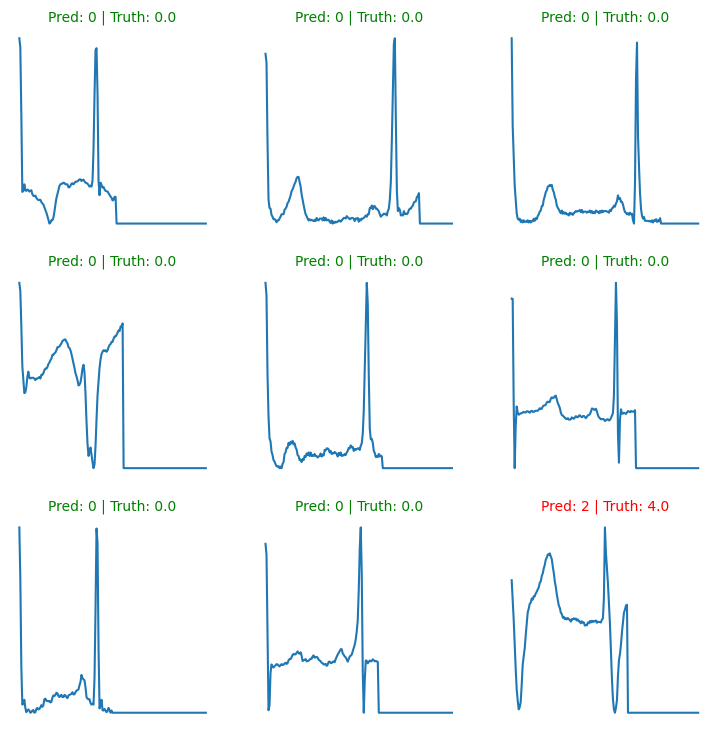

In [ ]:
#Now let's visualize:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create a subplot
  plt.subplot(nrows, ncols, i+1)

  plt.plot(sample.squeeze())

  # Find the prediction label (in text form, e.g. "0")
  pred_label = pred_classes[i]

  # Get the truth label (in text form, e.g. "2")
  truth_label = test_labels[i]

  # Create the title text of the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality and change title colour accordingly
  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") # green text if correct
  else:
      plt.title(title_text, fontsize=10, c="r") # red text if wrong
  plt.axis(False);

###Making a confusion matrix for further prediction evaluation :

In [ ]:
from tqdm.auto import tqdm
y_preds=[]
model_3.eval()
with torch.no_grad():
  for input, label in tqdm(test_dataloader,desc='Making predictions'):
    input, label = input.to(device), label.to(device)
    y_pred = model_3(input.unsqueeze(1))
    #Put predictions on CPU for evaluation
    y_preds.append(y_pred.cpu())
# Concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)

Making predictions:   0%|          | 0/343 [00:00<?, ?it/s]

In [ ]:
# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 961.5/961.5 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 76.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 52.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 780.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 63.2 MB/s eta 0:00:00
mlxtend version: 0.23.4


In [ ]:
# Import mlxtend upgraded version
import mlxtend
print(mlxtend.__version__)
assert int(mlxtend.__version__.split(".")[1]) >= 19

0.23.4


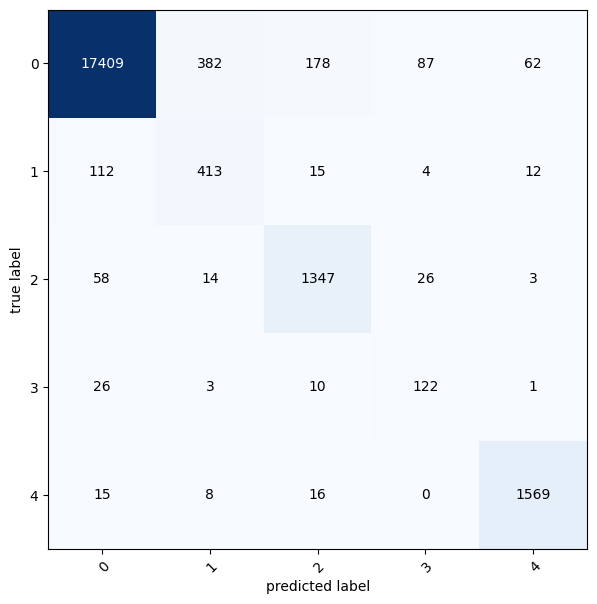

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 'y_test' contains the target labels
confmat = ConfusionMatrix(num_classes=5, task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor.argmax(dim=1),
                         target=torch.tensor(y_test, dtype=torch.int64))  # Convert y_test to a PyTorch tensor

# Define class names
class_names = ['0', '1', '2', '3', '4']

# Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10, 7)
);

Normalized confusion matrix


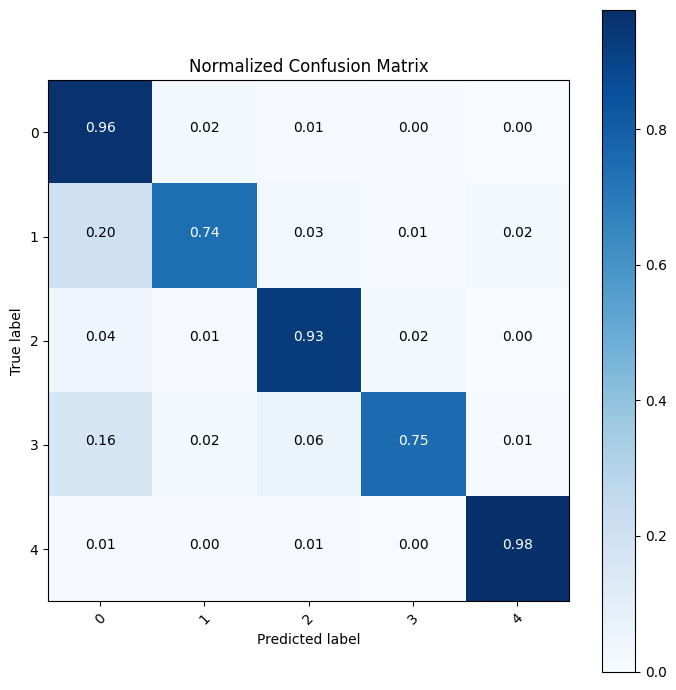

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
import torch

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    Displays the confusion matrix with or without normalization.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1, keepdims=True)
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

y_pred_labels = y_pred_tensor.argmax(dim=1).cpu().numpy()
y_true_labels = torch.tensor(y_test).cpu().numpy()

# --- Compute the confusion matrix using scikit-learn ---
cnf_matrix = confusion_matrix(y_true_labels, y_pred_labels)

plt.figure(figsize=(7, 7))
plot_confusion_matrix(cnf_matrix,
                      classes= ['0', '1', '2', '3', '4'],
                      normalize=True,
                      title='Normalized Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true_labels, y_pred_labels, digits=4))

              precision    recall  f1-score   support

           0     0.9880    0.9609    0.9743     18118
           1     0.5037    0.7428    0.6003       556
           2     0.8602    0.9302    0.8938      1448
           3     0.5105    0.7531    0.6085       162
           4     0.9526    0.9757    0.9641      1608

    accuracy                         0.9529     21892
   macro avg     0.7630    0.8726    0.8082     21892
weighted avg     0.9611    0.9529    0.9560     21892



###Interpretation of the results of the confusion matrix and classification report:   
####* for class 0: Excellent : we have high precision and recall
####* for class 1: Low precision: there's many false positives , but decent recall
####* for class 2: Very good:well balanced
####* for class 3:similar to class 1: recall is good but precision needs work
####* for class 4: Ecellent: well handled

###Overall Metrics:
####Accuracy: 95.29% --strong overall
####Macro avg F1: 0.8082 --Shows that class imbalance is affecting smaller classes
####Weighted avg F1: 0.9560-- reflects strong performance due to dominance of class 0

##Save and load our best performing model

In [ ]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True )

# Create model save path
MODEL_NAME = "ECG_arrhythmia_classification_model_3.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_3.state_dict(), # only saving the state_dict() only saves the learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/ECG_arrhythmia_classification_model_3.pth


#####Now we've got a saved model state_dict() we can load it back in using a combination of load_state_dict() and torch.load().

#####Since we're using load_state_dict(), we'll need to create a new instance of ECGTransformerV3() with the same input parameters as our saved model state_dict()

In [ ]:
# Create a new instance of FashionMNISTModelV2 (the same class as our saved state_dict())
#Provide input_dim and num_classes while creating an instance of ECGTransformerV3
loaded_model_3 = ECGTransformerV3(input_dim=X_train.shape[1],num_classes=5)

# Load in the saved state_dict()
loaded_model_3.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send model to GPU
loaded_model_3= loaded_model_3.to(device)

In [ ]:
# iterate through the keys and compare individual tensors using torch.equal()
all_equal = True
for key in loaded_model_3.state_dict():
    if not torch.equal(loaded_model_3.state_dict()[key], loaded_model_3.state_dict()[key]):
        all_equal = False
        break

print(all_equal)  # This will print True if all tensors are equal

True


####Now that we've got a loaded model we can evaluate it to make sure its parameters work similarly to model_3 prior to saving

In [ ]:
for epoch in range(10):
  loaded_model_3.eval()
  loaded_test_loss = 0.0
  test_correct = 0
  test_total = 0

  with torch.no_grad():
    for inputs, labels in test_dataloader:
      inputs, labels = inputs.to(device), labels.to(device)
      outputs = loaded_model_3(inputs.unsqueeze(1))
      loss = loss_fn(outputs, labels)

      loaded_test_loss += loss.item()
      _, predicted = outputs.max(1)
      test_total += labels.size(0)
      test_correct += predicted.eq(labels).sum().item()


      # Calculate metrics
  loaded_test_loss=loaded_test_loss/len(test_dataloader)
  loaded_test_acc=100.*test_correct/test_total

  # Update learning rate
  scheduler.step(test_loss)


,model_name,model_loss,model_acc
0,ECGTransformerV3,0.157723,95.285949


In [ ]:
loaded_model_3_results = pd.DataFrame([{
    'model_name': loaded_model_3.__class__.__name__,
    'model_loss': loaded_test_loss,
    'model_acc': loaded_test_acc
}])
loaded_model_3_results

,model_name,model_loss,model_acc
0,ECGTransformerV3,0.157723,95.285949


In [ ]:
model_3_results

,model_name,model_loss,model_acc
0,ECGTransformerV3,0.157723,95.285949
